# Ukraine Conflict Twitter - Sentiment Analysis/Recommandation based on Cosine Similiarity/Cross Validation with Muliple Classification Techniques (99% ACC)

In [3]:
%%time
import warnings   
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pycountry
lemmatizer = WordNetLemmatizer()
stopword = set(stopwords.words('english'))

CPU times: total: 1.73 s
Wall time: 4.61 s


In [4]:
# combined the twitters posted about Ukraine between Mar17 and Mar18, around 1 million posts in
df = pd.read_csv('MAR18_UkraineTwitter.csv')
df1 = pd.read_csv('MAR17.csv')
df = pd.concat([df, df1], ignore_index = True,
                          sort = False)
df.head(-3)

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,0,112073654,johnguilfoil,Basically the dad from Bluey. Public Relations...,Boston,1320,3652,34992,2010-02-07 05:18:07.000000,1504608519861018628,2022-03-18 00:00:00,0,Read this tweet and every single reply to it #...,"[{'text': 'Ukraine', 'indices': [45, 53]}]",en,NaN,0,2022-03-18 00:09:09.835940
1,1,902816295023988736,YashaShveller,qwer,NaN,503,135,32873,2017-08-30 08:52:33.000000,1504608520213258242,2022-03-18 00:00:00,63,ВСУ🇺🇦 уничтожили многоцелевой вертолет российс...,"[{'text': 'Ukraine', 'indices': [93, 101]}, {'...",ru,NaN,0,2022-03-18 00:09:09.827692
2,2,19897138,IndiaToday,"Brings you news breaks: Exclusive political, e...",India,245,5997687,999807,2009-02-02 07:21:54.000000,1504608520766861322,2022-03-18 00:00:00,1,Russia-Ukraine war: Is Vladimir Putin a war cr...,"[{'text': 'NewsToday', 'indices': [76, 86]}, {...",en,NaN,1,2022-03-18 00:03:54.604634
3,3,2533590570,joseph_less,NaN,NaN,387,637,52190,2014-05-29 23:16:56.000000,1504608520880197634,2022-03-18 00:00:00,12,The best battle is the one you don't have to f...,"[{'text': 'IStandWithUkraine', 'indices': [73,...",en,NaN,0,2022-03-18 00:09:09.819479
4,4,36327407,htTweets,One of India's largest media companies. Latest...,India,155,8435301,1034587,2009-04-29 10:11:34.000000,1504608520892690457,2022-03-18 00:00:00,1,This BMW 6 Series is modified for machine gun ...,"[{'text': 'Ukraine', 'indices': [99, 107]}, {'...",en,NaN,3,2022-03-18 00:09:09.811223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936722,468624,1183858884185907201,MordechaiLevin,Strategic Planning and Operations Execution | ...,NaN,283,71,2206,2019-10-14 21:35:37.000000,1504608511178813441,2022-03-17 23:59:57,0,@Nestle earned $1.8 billion in revenue last ye...,"[{'text': 'Russia', 'indices': [54, 61]}, {'te...",en,NaN,0,2022-03-18 00:09:09.895416
936723,468625,4831412975,SeanMac66468910,NaN,NaN,441,18,591,2016-01-21 01:51:32.000000,1504608511556206592,2022-03-17 23:59:58,917,"WATCH: The defenders of Kharkiv, our latest fo...",[],en,NaN,0,2022-03-18 00:09:09.887198
936724,468626,198163442,james_he_,Jr. Software Engineer @assemblyai,"Denver, CO",292,108,1041,2010-10-03 14:47:12.000000,1504608511577141257,2022-03-17 23:59:58,2,"How do you feel, Alfabank? :) \n#CancelRussia ...","[{'text': 'CancelRussia', 'indices': [52, 65]}...",en,NaN,0,2022-03-18 00:03:54.626970
936725,468627,1364829721880502272,teofilussw,"JUSTICE & #NoWar | Use English, 日本語, Deutsch, ...","インドネシア国ジャカルタ、Jakarta, ID、印尼雅加達",3430,377,34397,2021-02-25 06:49:14.000000,1504608511963328512,2022-03-17 23:59:58,0,COVID-19 sudah terbukti menyusahkan semua oran...,"[{'text': 'Russia', 'indices': [267, 274]}, {'...",in,NaN,2,2022-03-18 00:09:09.876960


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936730 entries, 0 to 936729
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      936730 non-null  int64 
 1   userid          936730 non-null  int64 
 2   username        936730 non-null  object
 3   acctdesc        736881 non-null  object
 4   location        560958 non-null  object
 5   following       936730 non-null  int64 
 6   followers       936730 non-null  int64 
 7   totaltweets     936730 non-null  int64 
 8   usercreatedts   936730 non-null  object
 9   tweetid         936730 non-null  int64 
 10  tweetcreatedts  936730 non-null  object
 11  retweetcount    936730 non-null  int64 
 12  text            936730 non-null  object
 13  hashtags        936730 non-null  object
 14  language        936730 non-null  object
 15  coordinates     1046 non-null    object
 16  favorite_count  936730 non-null  int64 
 17  extractedts     936730 non-nu

In [6]:
df.shape

(936730, 18)

In [7]:
# take look at the first 10 twitters in our dataset
df['text'][:10].tolist()

['Read this tweet and every single reply to it #Ukraine https://t.co/wKX5MMs6N8',
 'ВСУ🇺🇦 уничтожили многоцелевой вертолет российских оккупантов вместе с экипажем.\n#Ukraine #UkraineRussianWar #UkraineWar https://t.co/QYu43cgxUP',
 'Russia-Ukraine war: Is Vladimir Putin a war criminal?\n\nWatch full debate on #NewsToday with @sardesairajdeep\n\nFull Show: https://t.co/aAz4y2XQ4k\n\n#RussiaUkraineWar #VladimirPutin https://t.co/xoe8K157ng',
 "The best battle is the one you don't have to fight. \n\n#IStandWithUkraine #Ukraine https://t.co/trGun6yaOC",
 'This BMW 6 Series is modified for machine gun by Ukrainians to fight Russians\n\nvia @HTAutotweets | #Ukraine #Russia \n\nhttps://t.co/QjEdaVg2D4',
 'Si les US pouvaient réfléchir à ce qu\'ils ont fait à Cuba et au Panama ds les 60\'s,en Yougoslavie ds les 90\'s,en Afghanistan et Irak début 2000,en Syrie et Libye ensuite,ils verraient que ce sont des exemples typiques"d\'1 grand pays intimidant des petits"comme ils disent #Ukraine https:/

### Explantory Data Analysis

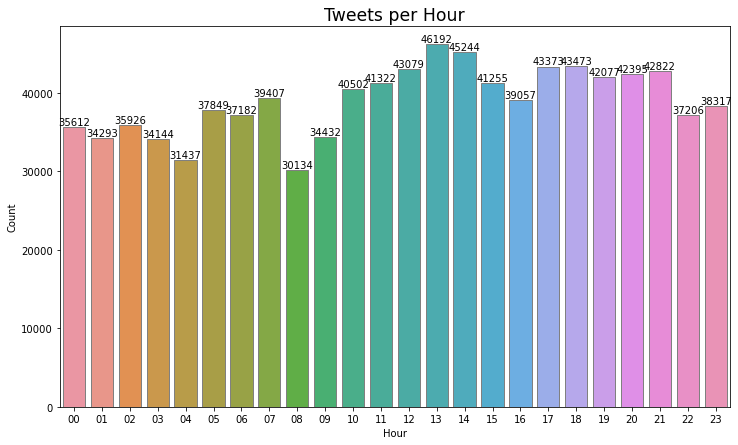

In [8]:
# change to date time format
df['extractedts']=pd.to_datetime(df['extractedts'])

# tweets per hour
tweets_per_hr = df['extractedts'].dt.strftime('%H').value_counts().sort_index().to_frame(name='Count')
tweets_per_hr['Hour']=tweets_per_hr.index

# plot
plt.figure(figsize=(12,7))
ax=sns.barplot(x='Hour', y='Count',data=tweets_per_hr, edgecolor='grey')
ax.bar_label(ax.containers[0])
plt.title('Tweets per Hour', size='xx-large')
plt.show()

It's pretty uniformly distributed, however, afternoon to midnight witnessed more tweets than morning.

In [9]:
# show where most posts are located
df['location'].value_counts()[:10]

United States      7675
Ukraine            5366
Україна            3562
London, England    3386
USA                3364
France             3266
Canada             3213
India              3170
London             3105
UK                 2734
Name: location, dtype: int64

Note there are duplicate locations, work on them below.

In [10]:
# excluding null values (where location is not specified) in user_location 
location = [loc for loc in df['location'] if type(loc)==str]

# extracting country names from given location
country_name = [country.name for loc in location for country in pycountry.countries if country.name in loc]
country_name[:9]

['India',
 'India',
 'Australia',
 'Ukraine',
 'United Kingdom',
 'Canada',
 'Australia',
 'Portugal',
 'Philippines']

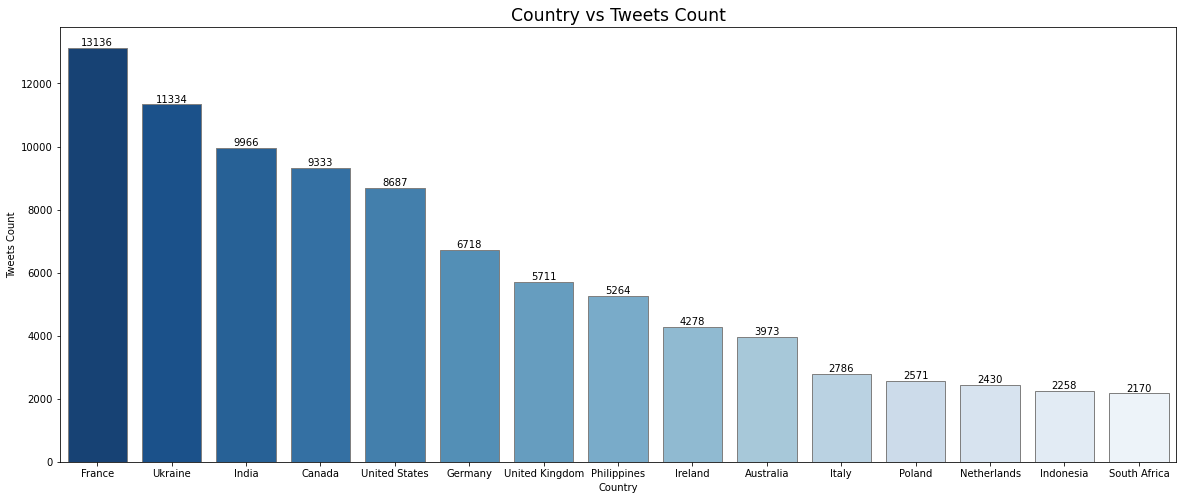

In [11]:
# dictionary to count number of occurances of each country
count={}
for country in country_name:
    count[country] = count.get(country, 0) + 1

# Country vs tweets count
country_df = pd.DataFrame({'Country': list(count.keys()),'Tweets Count': list(count.values())})
country_df = country_df.sort_values(by = 'Tweets Count', ascending=False)
country_df=country_df[:15] # top 15 countries

# plot the data
plt.figure(figsize=(20,8))
plt.title('Country vs Tweets Count', size='xx-large')
ax = sns.barplot(x='Country', y='Tweets Count',data=country_df, palette='Blues_r', edgecolor='grey');
ax.bar_label(ax.containers[0])
plt.show()

In [12]:
# text preprocessing
def preprocess(text):
    
    # remove new lines
    text = text.replace('\n', ' ')
    
    # remove links
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    
    # remove hashtags at the end of text
    text = re.sub('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', '',text)
    
    # remove handles
    text = re.sub('@[\w]+', '',text)
    
    # remove punctuations
    punc ='''.?!,:;-_—[](){}'"`~|\/@#$%^&+=*'''
    for i in text:
        if i in punc:
            text = text.replace(i, '') 
    
    # remove extra spaces
    re.sub("\s\s+", " ", text)
    
    # lower case
    text = text.strip().lower()
    
    # lemmatization
    text = [lemmatizer.lemmatize(word) for word in text.split(' ')]
    text=" ".join(text)
    
    # stopword removal
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)

    # replace covid19 with covid
    text=text.replace('covid19','covid')
    
    return text


# remove promotional tweets (with words 'subscribe' and 'subscription')
def no_spam(text):
    if 'subscri' in text:
        text=''
    return text


In [13]:
# apply functions
df['text']= df['text'].apply(preprocess)
df['text']= df['text'].apply(no_spam)

In [14]:
# only emojis that composed by ascii characters will remain in the our text, since emoji can heavily represent user's sentiment
def demoji(text):
    
    # frequent emojis which will be kept
    pattern = '😤|😡|😠|😑|🙄|🤨|😶|😱|🙀|😲|😓|😰|😢|😥|😭|😪|🤕|😔|😣|🙁|😒|😖|😕|🥴|🤒|☹️|😞|😷|🤧|😧|😨|😩|🥺|😦|😆|😀|🤭|🤩|😌|🥰|😁|😘|😂|😅|😊|😝|😙|😇'
    for word in text:    
        if re.match(pattern, word):
            continue
            
        # remove all other non ascii characters
        text=text.replace(word, re.sub('[^\x00-\x7f]','', word)).strip()
        
    return text


df['text']= df['text'].apply(demoji)

In [15]:
# convert emoji to sentiment keys
def convert(text):
    
    # dictionary of emoji with their meaning
    d = {'😤':'frustrated','😡':'angry','😠':'angry','😱':'horrified','🙀':'shock','😲':'shock','🙄':'disapproval',
         '🤨':'suspicion','😶':'disappointment','😓':'sad','😰':'sad','😢':'sad','😥':'sad','😭':'sad','😪':'sad',
         '🤕':'sad','😔':'sad','😣':'sad','🙁':'sad','😒':'sad','😖':'sad','😕':'sad','🥴':'sad','🤒':'sad','☹️':'sad',
         '😞':'sad','😷':'sick','🤧':'sick','😧':'sad','😨':'sad','😩':'sad','🥺':'sad','😦':'sad','😫':'sad',
         '😆':'happy','😀':'smile','🤭':'embarrassment','🤩':'exciting','🥰':'affection','😁':'smile','😂':'laugh',
         '😅':'nervousness','😊':'smile','😝':'fun','😙':'affection','😇':'blessed'}
    
    for emoji, sentiment in d.items():
        text=text.replace(emoji, sentiment)
    return text

df['senti_text']= df['text'].apply(convert)

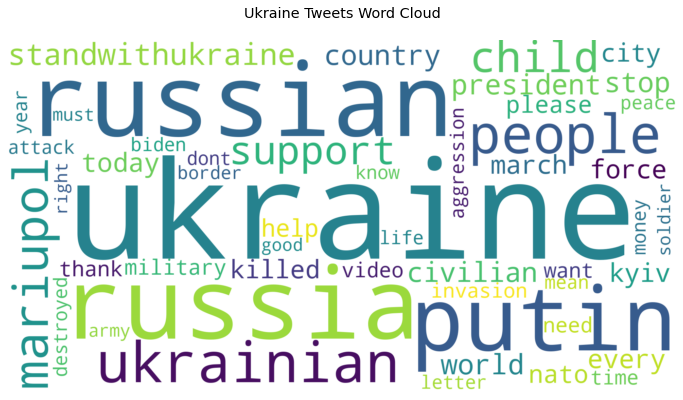

In [16]:
# creating the text for wordcloud map
text = " ".join(tweet for tweet in df.text)

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations=False, background_color='white',
                       max_words=50, stopwords=STOPWORDS, min_word_length=4,
                       width=2048, height=1080).generate(text)

# Display the generated Word Cloud
plt.figure(figsize=(12,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Ukraine Tweets Word Cloud\n', size='x-large')
plt.show()

Map above shows the most used word in Ukraine Conflict tweets: Putin, standwithukraine, russian, killed, civilian, etc.

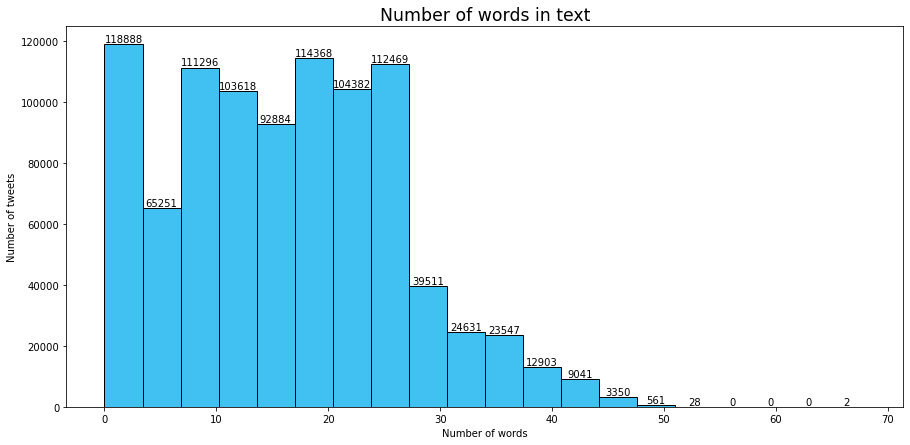

In [17]:
# word count
word_count = [len(text.split()) for text in df.text]
df['word_count'] = word_count

# plot
plt.figure(figsize=(15,7))
ax=sns.histplot(x='word_count', data=df, bins=20, color='#00acee')
ax.bar_label(ax.containers[0])
plt.title('Number of words in text',size='xx-large')
plt.xlabel('Number of words')
plt.ylabel('Number of tweets')
plt.show()

Graph shows that most twitters have words between 0 to 25.

In [18]:
# excluding text with less than 3 words
df=df[df['word_count']>2]

# excluding tweets with more than 16 words
df=df[df['word_count']<30]

In [19]:
# Sentimentize text
from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

df["Positive"] = [SIA.polarity_scores(i)["pos"] for i in df["senti_text"]]
df["Neutral"] = [SIA.polarity_scores(j)["neu"] for j in df["senti_text"]]
df["Negative"] = [SIA.polarity_scores(k)["neg"] for k in df["senti_text"]]

df1 = df[["text", "Positive","Neutral", "Negative"]]
df1.head()

,text,Positive,Neutral,Negative
0,read tweet every single reply,0.000,1.000,0.000
2,russiaukraine war vladimir putin war criminal ...,0.000,0.446,0.554
3,best battle one dont fight,0.581,0.182,0.237
4,bmw 6 series modified machine gun ukrainian fi...,0.000,0.583,0.417
7,putin lie many thing right say west hold russi...,0.157,0.595,0.248


In [20]:
# counting positive, neutral and negative tweets

sentiments_nltk = []

for tweet in df.senti_text:
    sentiment_dict = SIA.polarity_scores(tweet)
    sentiment_dict.pop('compound', None)
    sentiments_nltk.append(max(sentiment_dict , key=sentiment_dict.get))
    
df['sentiment_nltk'] = sentiments_nltk
df['sentiment_nltk'].value_counts()

neu    677893
pos     40598
neg     34866
Name: sentiment_nltk, dtype: int64

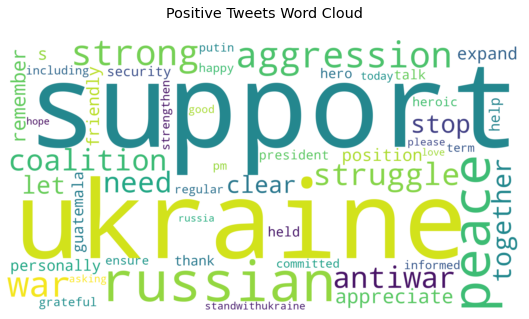

In [21]:
pos_tweets = " ".join(sentiment for sentiment in df[df['sentiment_nltk']=='pos']['text'])

# Creating word cloud of positive tweets
stopwords_p = STOPWORDS
stopwords_p.update(('omicron','covid', 'u','ha','amp','one','people','variant','mask'))
word_cloud1 = WordCloud(collocations=False, background_color='white',
                       max_words=50, stopwords=stopwords_p, #min_word_length=4,
                       width=2048, height=1080).generate(pos_tweets)

# Display the generated Word Cloud
plt.figure(figsize=(10,5))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.title('Positive Tweets Word Cloud\n', size='x-large')
plt.savefig('./wc_positive.jpg',dpi=720)

plt.show()

Postive tweets like to contain words: peace, thank, asking, please, dear, happy, support, etc.

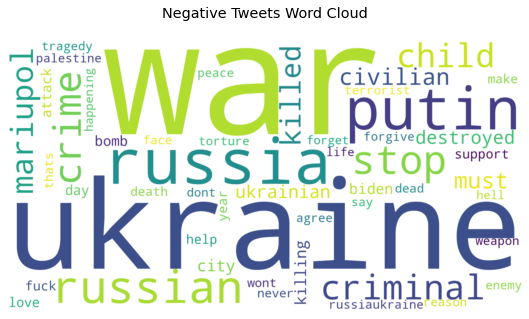

In [22]:
neg_tweets = " ".join(sentiment for sentiment in df[df['sentiment_nltk']=='neg']['text'])

# Creating word cloud of positive tweets
stopwords_n = STOPWORDS
stopwords_n.update(('vaccine','news','im','time','world','travel')) # 
word_cloud2 = WordCloud(collocations=False, background_color='white',
                       max_words=50, stopwords=stopwords_n,
                       width=2048, height=1080).generate(neg_tweets)

# Display the generated Word Cloud
plt.figure(figsize=(10,5))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.title('Negative Tweets Word Cloud\n', size='x-large')
plt.show()

negative tweets like to contain words: war, destroyed, stop, authority, etc.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Transform a count matrix to a normalized tf or tf-idf representation.
tfidf = TfidfVectorizer(stop_words='english')

In [24]:
# due to high need for ram, change the data format to feather to save memory and processing time
import feather
df.reset_index().to_feather('twitter.feather')

In [25]:
feather.write_dataframe(df, 'twitter.feather')
df = pd.read_feather('twitter.feather')
df = df.drop_duplicates(subset='senti_text')

In [26]:
df_n = df[:30000]
df_n.shape

(30000, 24)

In [27]:
tfidf_matrix = tfidf.fit_transform(df_n['senti_text'])
tfidf_matrix.shape

(30000, 55470)

In [28]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [29]:
indices = pd.Series(df_n.index, index=df_n['text']).drop_duplicates(keep = 'first')

In [30]:
# Recommendation
def recommendations(text):
    idx = indices[text]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the cosine similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Geting the scores of the 10 most similar movies
    # Started at index 1 because index 0 is the one with the 1 cosine similarity which is the same show
    sim_scores = sim_scores[1:11]

    twitter_indices = [i[0] for i in sim_scores]
    return df_n['text'].iloc[twitter_indices]

In [31]:
recommendations('read tweet every single reply')

40101                                   reply reply thanks
32869                                   everyone must read
57130    ha cut ability reply tweet  doesnt want hear c...
33752                   tweet day ukraine standwithukraine
47757         russian war crime every single day world see
96261                                 mariupol please read
11150    see deciding withdrawal business russia  ha di...
43270    claim reply mine set 1 set 2  first serious bu...
45699                     putin  signing every single word
73768    someone reply tweet neutralize ukraine blocked...
Name: text, dtype: object

based on tokenized sentiment text, we can recommand users most related, sentimentized tweets.

In [32]:
recommendations('love single come go please stay late want to')

49813    son estas historiasdevidainvasionputin putin p...
75747    putin  putinisawarcriminal putler killputin st...
7077     putinisawarcriminal putler killputin standwith...
54932    putinhitler putinisawarcriminal putin standwit...
34350    ukrainerussiawar   putinisawarcriminal ukraine...
20330    ukrainerussiawar   putinisawarcriminal putinsw...
42636    putinisawarcriminal putinhitler putinswar     ...
21209    putinisawarcriminal putinswarcrimes slavaukrai...
30712    1slavaukraini putinisawarcriminal  standwithuk...
40192    marjorietaylorgreene putinisawarcriminal russi...
Name: text, dtype: object

In [33]:
recommendations('love single come go please stay late want to')

49813    son estas historiasdevidainvasionputin putin p...
75747    putin  putinisawarcriminal putler killputin st...
7077     putinisawarcriminal putler killputin standwith...
54932    putinhitler putinisawarcriminal putin standwit...
34350    ukrainerussiawar   putinisawarcriminal ukraine...
20330    ukrainerussiawar   putinisawarcriminal putinsw...
42636    putinisawarcriminal putinhitler putinswar     ...
21209    putinisawarcriminal putinswarcrimes slavaukrai...
30712    1slavaukraini putinisawarcriminal  standwithuk...
40192    marjorietaylorgreene putinisawarcriminal russi...
Name: text, dtype: object

### Cross-validation with Different Machine Learning Models 

In [34]:
df1_y = df1[['Positive', 'Neutral', 'Negative']]
df1_y = df1_y.idxmax(axis=1)
df1_y =df1_y.to_frame()
df1_y.columns = ['sentiment']
df1_y.head()

,sentiment
0,Neutral
2,Negative
3,Positive
4,Neutral
7,Neutral


In [35]:
# format sentiment into numerical values
def convert_sentiment(sentiment):
    if  sentiment == "Positive":
        return 2
    elif sentiment == "Neutral":
        return 1
    elif sentiment == "Negative":
        return 0


df1_y.sentiment = df1_y.sentiment.apply(lambda x : convert_sentiment(x))
df1_y.head()

,sentiment
0,1
2,0
3,2
4,1
7,1


In [36]:
df1_y.sentiment.value_counts()

1    677985
2     41429
0     33943
Name: sentiment, dtype: int64

In [37]:
# due to limited computational power and ram size, I decided to use 30000 tweets to build our model
x = df1['text'].iloc[:30000]
y = df1_y['sentiment'].iloc[:30000]

In [38]:
x_final = tfidf.fit_transform(x)

In [39]:
# oversample the minority class using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_df, y_df = smote.fit_resample(x_final, y)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.25)

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [42]:
# gradient boosting approach
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_prediction =  gbc.predict(X_test)

In [43]:
accuracy_score(gbc_prediction,y_test)

0.8729134866315427

In [44]:
# decision tree approach
ds = DecisionTreeClassifier()
ds.fit(X_train,y_train)
ds_prediction =  ds.predict(X_test)

In [45]:
accuracy_score(ds_prediction,y_test)

0.9708011226549805

In [46]:
# random forest approach
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_prediction =  rf.predict(X_test)

In [47]:
accuracy_score(rf_prediction,y_test)

0.9808951696292284

In [48]:
# xgboost approach
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_prediction =  xgb.predict(X_test)

[11:42:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [49]:
accuracy_score(xgb_prediction,y_test)

0.9574080456940273

In [50]:
# SVM approach
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)

In [51]:
accuracy_score(svm_prediction,y_test)

0.9892166034762913

In [52]:
# Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)

In [53]:
accuracy_score(nb_prediction,y_test)

0.9512038997488798

In [54]:
# SVM model provides the best accurary - 99%
cr = classification_report(y_test, svm_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      6787
           1       1.00      1.00      1.00      6746
           2       0.97      1.00      0.98      6776

    accuracy                           0.99     20309
   macro avg       0.99      0.99      0.99     20309
weighted avg       0.99      0.99      0.99     20309



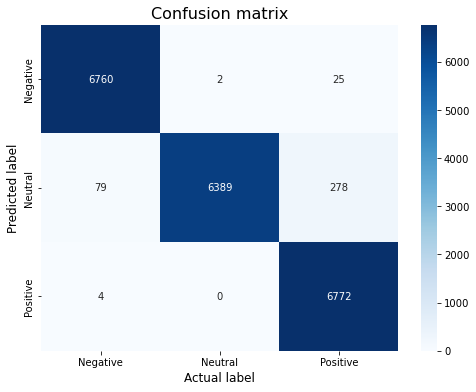

In [55]:
print("Classification Report:\n----------------------\n", cr)

cm = confusion_matrix(y_test,rf_prediction)


# plot confusion matrix 
plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()